In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv('prospects_data.csv',encoding = 'ISO-8859-1',
                   usecols = ['Status','Allocation Status','Pincode','Type of Project','No of Windows','Source',
'Price Per Sft','Aesthetics','Reduce Street Noise','Low Maintenance','Monsoon Proof','Better Lighting','Reduce AC Energy Cost'] )

In [3]:
data.head()

,Allocation Status,Status,Pincode,Type of Project,No of Windows,Source,Price Per Sft,Aesthetics,Reduce Street Noise,Low Maintenance,Monsoon Proof,Better Lighting,Reduce AC Energy Cost
0,Dealer,Won,600008,Renovation,6 to 10,Friends or Family,1105,1.0,1.0,0.0,0.0,0.0,0.0
1,Dealer,Lost,600042,New Construction,6 to 10,Just dial,985,NaN,NaN,NaN,NaN,NaN,NaN
2,Dealer,Lost,600015,New Construction,1 to 5,Current User,918,NaN,NaN,NaN,NaN,NaN,NaN
3,Direct,Lost,600075,New Construction,21 to 40,Friends or Family,919,NaN,NaN,NaN,NaN,NaN,NaN
4,Direct,Won,600041,Renovation,6 to 10,Internet,1350,0.0,0.0,0.0,0.0,0.0,1.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 13 columns):
Allocation Status        229 non-null object
Status                   229 non-null object
Pincode                  229 non-null int64
Type of Project          229 non-null object
No of Windows            229 non-null object
Source                   229 non-null object
Price Per Sft            229 non-null int64
Aesthetics               37 non-null float64
Reduce Street Noise      37 non-null float64
Low Maintenance          37 non-null float64
Monsoon Proof            37 non-null float64
Better Lighting          37 non-null float64
Reduce AC Energy Cost    37 non-null float64
dtypes: float64(6), int64(2), object(5)
memory usage: 23.3+ KB


In [5]:
data = data.replace(np.NaN, 0)
data.head()

,Allocation Status,Status,Pincode,Type of Project,No of Windows,Source,Price Per Sft,Aesthetics,Reduce Street Noise,Low Maintenance,Monsoon Proof,Better Lighting,Reduce AC Energy Cost
0,Dealer,Won,600008,Renovation,6 to 10,Friends or Family,1105,1.0,1.0,0.0,0.0,0.0,0.0
1,Dealer,Lost,600042,New Construction,6 to 10,Just dial,985,0.0,0.0,0.0,0.0,0.0,0.0
2,Dealer,Lost,600015,New Construction,1 to 5,Current User,918,0.0,0.0,0.0,0.0,0.0,0.0
3,Direct,Lost,600075,New Construction,21 to 40,Friends or Family,919,0.0,0.0,0.0,0.0,0.0,0.0
4,Direct,Won,600041,Renovation,6 to 10,Internet,1350,0.0,0.0,0.0,0.0,0.0,1.0


## Replacing 1 as liked and 0 as not liked

In [6]:
def replace_func(a):
    for i in range(0,len(a)):
        if(a[i]==1):
            a[i] = 'liked'
        else:
            a[i] = 'disliked'
    return(a)

In [7]:
data['Aesthetics'] = replace_func(data['Aesthetics'])
data['Reduce Street Noise'] = replace_func(data['Reduce Street Noise'])
data['Low Maintenance']   = replace_func(data['Low Maintenance'])      
data['Monsoon Proof']    = replace_func(data['Monsoon Proof'])       
data['Better Lighting']  = replace_func(data['Better Lighting'])      
data['Reduce AC Energy Cost'] = replace_func(data['Reduce AC Energy Cost'])

In [8]:
data['Aesthetics']              =  data['Aesthetics'].astype('category')
data['Reduce Street Noise']     =  data['Reduce Street Noise'].astype('category')
data['Low Maintenance']         =  data['Low Maintenance'].astype('category')
data['Monsoon Proof']           =  data['Monsoon Proof'].astype('category')
data['Better Lighting']         =  data['Better Lighting'].astype('category')
data['Reduce AC Energy Cost']   =  data['Reduce AC Energy Cost'].astype('category')         
data['Pincode']                 =  data['Pincode'].astype('category')    

## Summary Statistics

In [9]:
print(data.describe(include = [np.number]))

       Price Per Sft
count     229.000000
mean     1045.323144
std       220.032076
min       650.000000
25%       921.000000
50%      1030.000000
75%      1129.000000
max      3121.000000


In [10]:
print(data.describe(exclude = [np.number]))

       Allocation Status Status  Pincode Type of Project No of Windows  \
count                229    229      229             229           229   
unique                 2      2      103               2             6   
top               Dealer   Lost   600041      Renovation        1 to 5   
freq                 165    176       14             142           150   

          Source Aesthetics Reduce Street Noise Low Maintenance Monsoon Proof  \
count        229        229                 229             229           229   
unique         4          2                   2               2             2   
top     Internet   disliked            disliked        disliked      disliked   
freq         124        220                 205             211           226   

       Better Lighting Reduce AC Energy Cost  
count              229                   229  
unique               2                     2  
top           disliked              disliked  
freq               228             

## Univariate Analysis

In [11]:
data.columns

Index(['Allocation Status', 'Status', 'Pincode', 'Type of Project',
       'No of Windows', 'Source', 'Price Per Sft', 'Aesthetics',
       'Reduce Street Noise', 'Low Maintenance', 'Monsoon Proof',
       'Better Lighting', 'Reduce AC Energy Cost'],
      dtype='object')

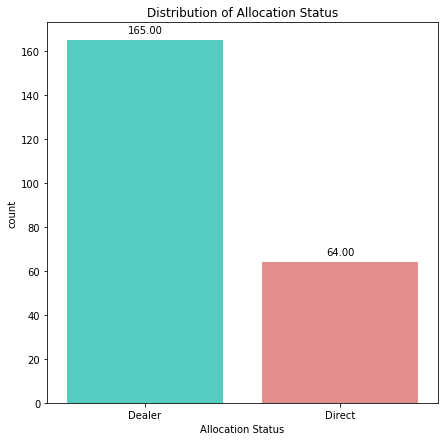

In [12]:
plt.figure(figsize=(7, 7))
clr = ["turquoise", "lightcoral"]
current_palette = sns.color_palette(clr)
lm = sns.countplot(x='Allocation Status',data=data,palette=current_palette)

# Add a title to the Figure
lm.set_title('Distribution of Allocation Status', fontsize=12)
for p in lm.patches:
    lm.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.savefig('Allocation Status')

    -- It's noted that the no of orders received through Dealer is almost twice the no of orders received Directly.

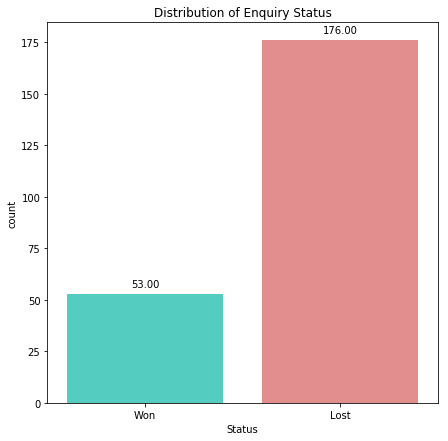

In [13]:
plt.figure(figsize=(7, 7))
lm = sns.countplot(x='Status',data=data,palette=current_palette)

# Add a title to the Figure
lm.set_title('Distribution of Enquiry Status', fontsize=12)
for p in lm.patches:
    lm.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.savefig('Status')


    -- More no. of orders have been lost 

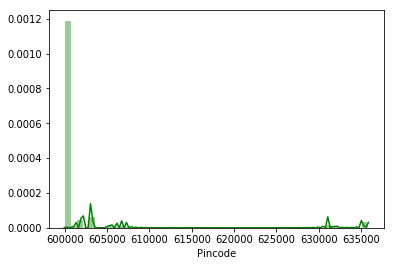

In [14]:
sns.distplot(data['Pincode'],color='green')

    -- More no. of orders have been received from the locality with Pincode- 600000

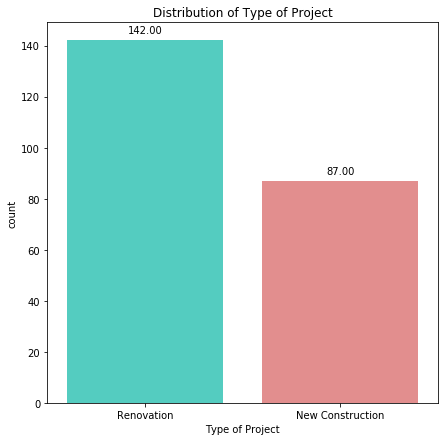

In [15]:
plt.figure(figsize=(7, 7))
lm =sns.countplot(x='Type of Project',data=data,palette=current_palette)
# Add a title to the Figure
lm.set_title('Distribution of Type of Project', fontsize=12)
for p in lm.patches:
    lm.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.savefig('Type of Project')

    -- The Orders for Renovation are higher compared to New Construction

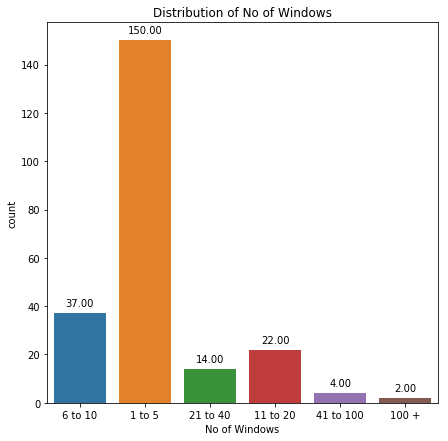

In [16]:
plt.figure(figsize=(7, 7))
lm = sns.countplot(x='No of Windows',data=data)
# Add a title to the Figure
lm.set_title('Distribution of No of Windows', fontsize=12)
for p in lm.patches:
    lm.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.savefig('No of Windows')

    -- On the whole customers tend to prefer 1 to 5 windows

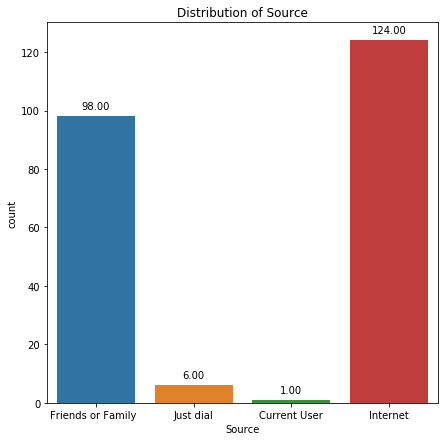

In [17]:
plt.figure(figsize=(7, 7))
lm = sns.countplot(x='Source',data=data)
# Add a title to the Figure
lm.set_title('Distribution of Source', fontsize=12)
for p in lm.patches:
    lm.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.savefig('Source')

    -- The Source for a large no. of customers is through Internet, closely followed by Freinds or Family

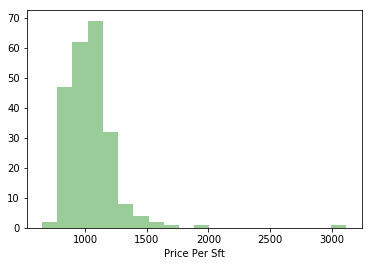

In [18]:
sns.distplot(data['Price Per Sft'],kde=False,bins=20,color='green')

    -- From the above graph we can observe that more no. of customers generally prefer houses whose price per sq. feet is around 1000

## Aditional Features Information Spread

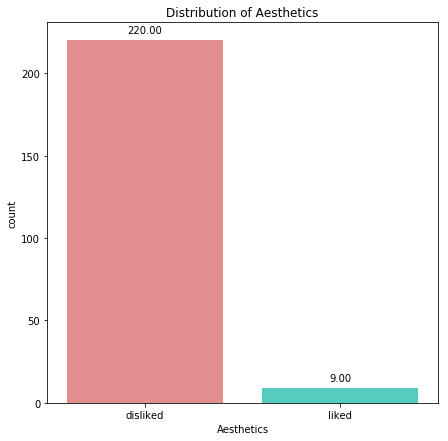

In [19]:
clr = ["lightcoral","turquoise"]

plt.figure(figsize=(7, 7))
lm = sns.countplot(x='Aesthetics',data=data,palette=clr)
# Add a title to the Figure
lm.set_title('Distribution of Aesthetics', fontsize=12)
for p in lm.patches:
    lm.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.savefig('Aesthetics')

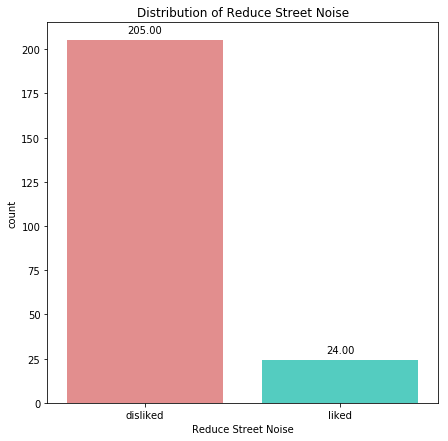

In [20]:
plt.figure(figsize=(7, 7))
lm = sns.countplot(x='Reduce Street Noise',data=data,palette=clr)
# Add a title to the Figure
lm.set_title('Distribution of Reduce Street Noise', fontsize=12)
for p in lm.patches:
    lm.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.savefig('Reduce Street Noise')

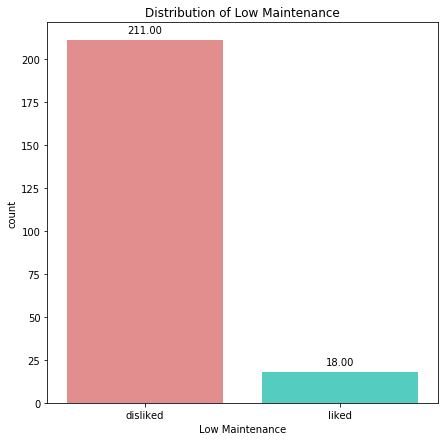

In [21]:
#sns.countplot(x='Low Maintenance',data=data)

plt.figure(figsize=(7, 7))
lm = sns.countplot(x='Low Maintenance',data=data,palette=clr)
# Add a title to the Figure
lm.set_title('Distribution of Low Maintenance', fontsize=12)
for p in lm.patches:
    lm.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.savefig('Low Maintenance')

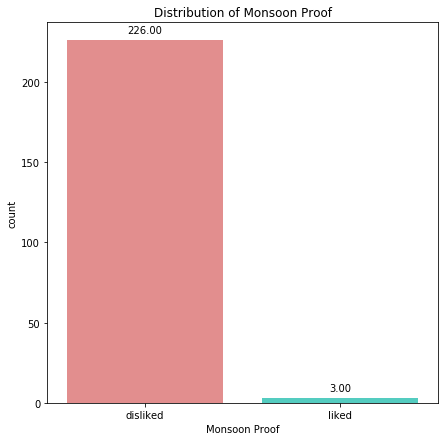

In [22]:

plt.figure(figsize=(7, 7))
lm = sns.countplot(x='Monsoon Proof',data=data,palette=clr)
# Add a title to the Figure
lm.set_title('Distribution of Monsoon Proof', fontsize=12)
for p in lm.patches:
    lm.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.savefig('Monsoon Proof')

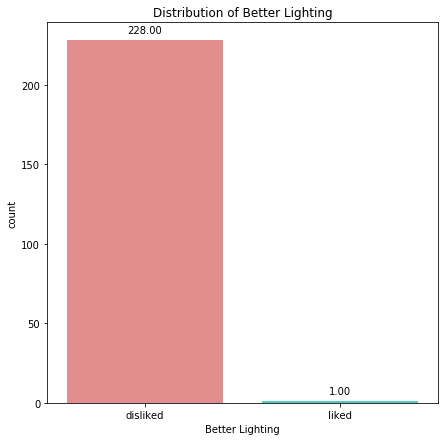

In [23]:
plt.figure(figsize=(7, 7))
lm = sns.countplot(x='Better Lighting',data=data,palette=clr)
# Add a title to the Figure
lm.set_title('Distribution of Better Lighting', fontsize=12)
for p in lm.patches:
    lm.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.savefig('Better Lighting')

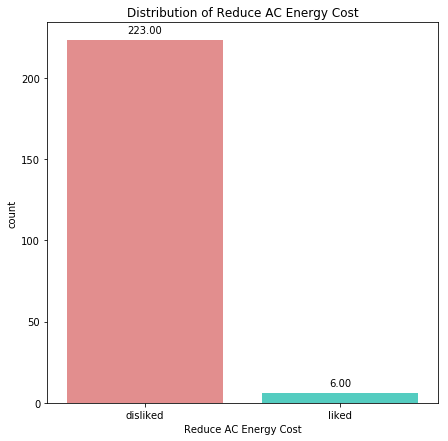

In [24]:
plt.figure(figsize=(7, 7))
lm = sns.countplot(x='Reduce AC Energy Cost',data=data,palette=clr)
# Add a title to the Figure
lm.set_title('Distribution of Reduce AC Energy Cost', fontsize=12)
for p in lm.patches:
    lm.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.savefig('Reduce AC Energy Cost')

     -- From the graph it's clear that many customers didn't like the Aesthetics,Reduce Street Noise,Low Maintenance, Monsoon Proof,Better Lighting, Reduce AC Energy Cost features.

## Bivariate Analysis

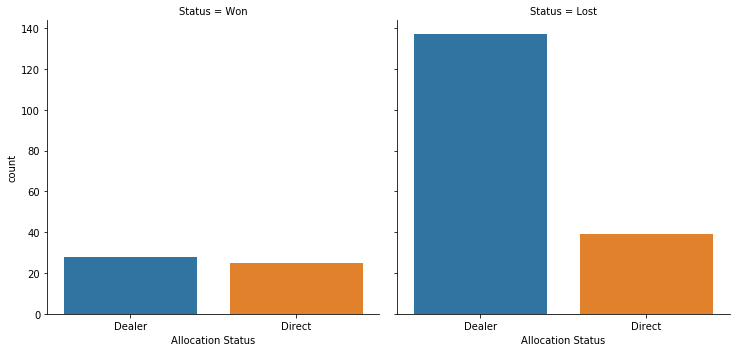

In [25]:
sns.factorplot("Allocation Status", col = "Status", col_wrap = 3,data = data[data.Status.notnull()],kind = "count")
plt.show()

     -- It's noted that most no, of orders lost are through Dealers. While the no. of orders through Dealer as well as Direct are similar.

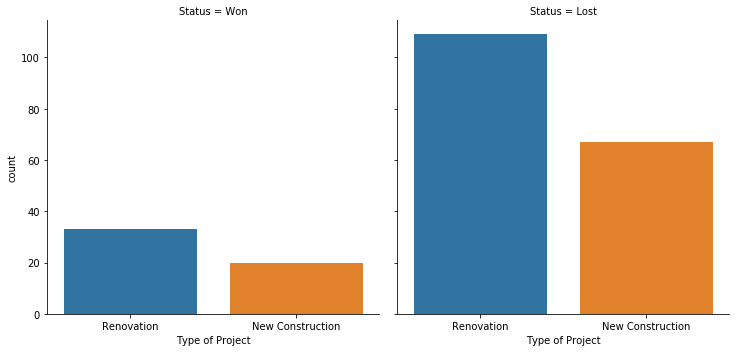

In [26]:
sns.factorplot("Type of Project", col = "Status", col_wrap = 3,data = data[data.Status.notnull()],kind = "count")
plt.show()

    -- Also the New Construction projects account for more no. of oredrs lost compared to wins. But the maximum no. of orders lost is through projects involving Renovation though it has higher no. of orders.

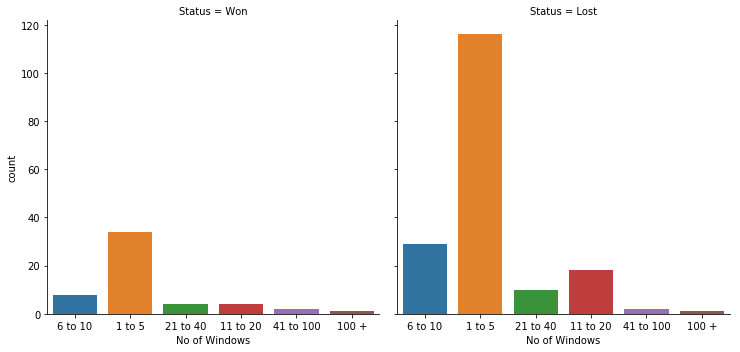

In [27]:
sns.factorplot("No of Windows", col = "Status", col_wrap = 3,data = data[data.Status.notnull()],kind = "count")
plt.show()

    -- It's seen that customers prefer lesser no. of windows on the whole

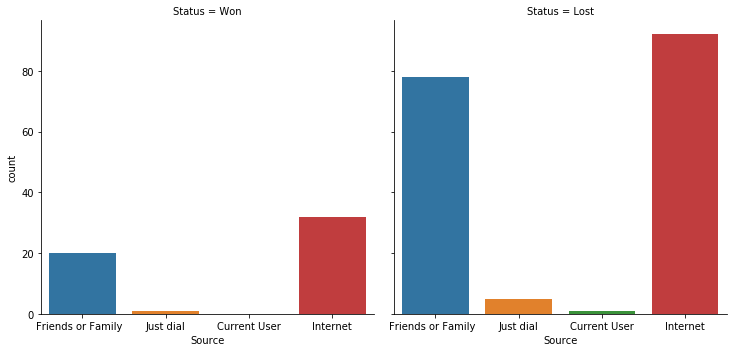

In [28]:
sns.factorplot("Source", col = "Status", col_wrap = 3,data = data[data.Status.notnull()],kind = "count")
plt.show()

    -- Though the no. of orders via Internet and Friends or Family is high most of them account for Loss. 

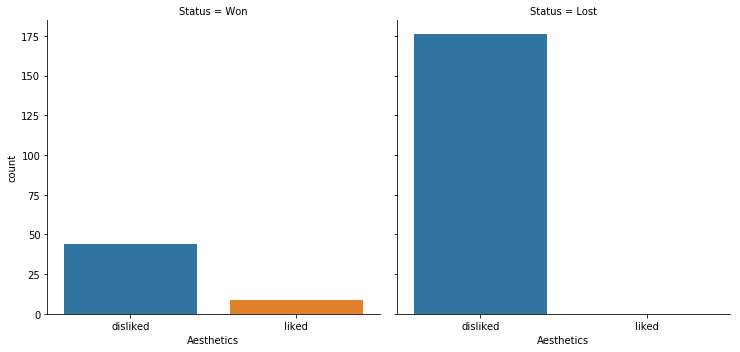

In [29]:
sns.factorplot("Aesthetics", col = "Status", col_wrap = 3,data = data[data.Status.notnull()],kind = "count")
plt.show()

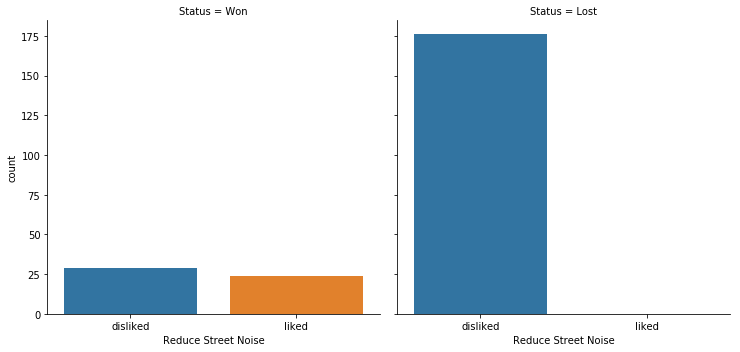

In [30]:
sns.factorplot("Reduce Street Noise", col = "Status", col_wrap = 3,data = data[data.Status.notnull()],kind = "count")
plt.show()

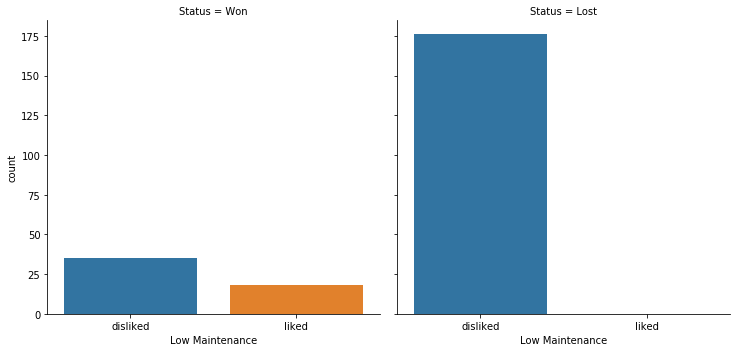

In [31]:
sns.factorplot("Low Maintenance", col = "Status", col_wrap = 3,data = data[data.Status.notnull()],kind = "count")
plt.show()

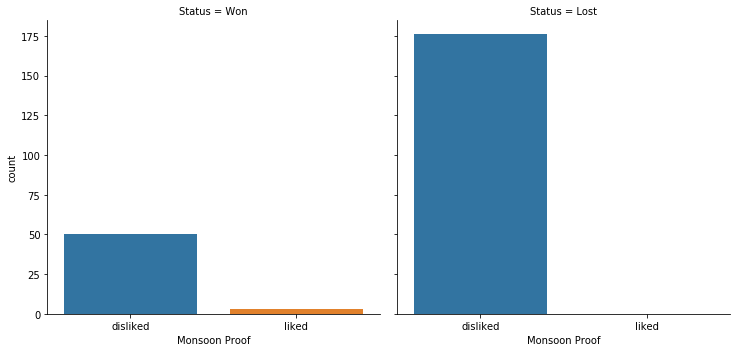

In [32]:
sns.factorplot("Monsoon Proof", col = "Status", col_wrap = 3,data = data[data.Status.notnull()],kind = "count")
plt.show()

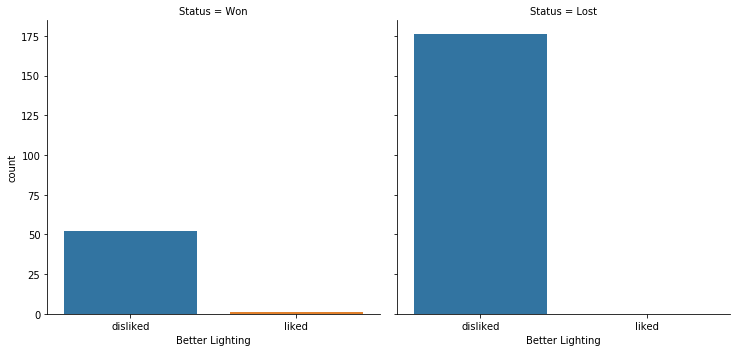

In [33]:
sns.factorplot("Better Lighting", col = "Status", col_wrap = 3,data = data[data.Status.notnull()],kind = "count")
plt.show()

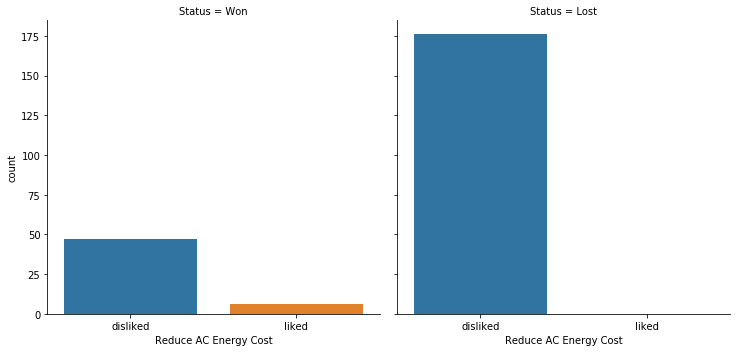

In [34]:
sns.factorplot("Reduce AC Energy Cost", col = "Status", col_wrap = 3,data = data[data.Status.notnull()],kind = "count")
plt.show()

     -- As seen in Univariate Analysis, the additional Features such as Aesthetics,Reduce Street Noise,Low Maintenance, Monsoon Proof,Better Lighting, Reduce AC Energy Cost are disliked by the customers and are accounting for more losing more orders. Hence proper analysis should be done to make a decison on investing on them. 

## Stacked Bar Graphs

Status             Lost  Won
Allocation Status           
Dealer              137   28
Direct               39   25


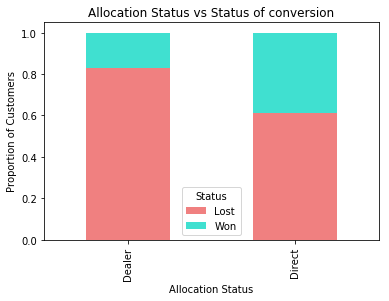

In [35]:
table=pd.crosstab(data['Allocation Status'],data.Status)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=clr)
plt.title('Allocation Status vs Status of conversion')
plt.xlabel('Allocation Status')
plt.ylabel('Proportion of Customers')
print(table)

Status            Lost  Won
Type of Project            
New Construction    67   20
Renovation         109   33


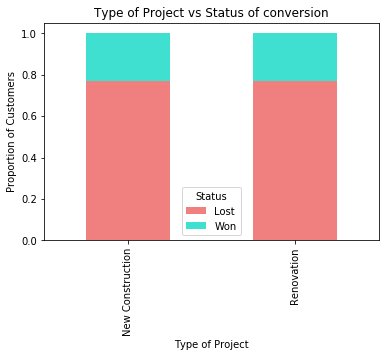

In [36]:
table=pd.crosstab(data['Type of Project'],data.Status)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=clr)
plt.title('Type of Project vs Status of conversion')
plt.xlabel('Type of Project')
plt.ylabel('Proportion of Customers')
print(table)

Status         Lost  Won
No of Windows           
1 to 5          116   34
100 +             1    1
11 to 20         18    4
21 to 40         10    4
41 to 100         2    2
6 to 10          29    8


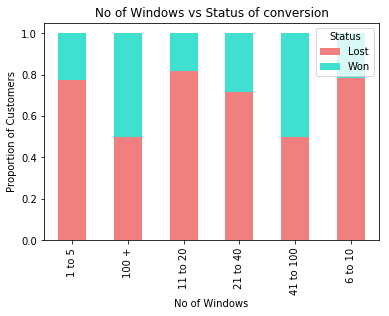

In [37]:
table=pd.crosstab(data['No of Windows'],data.Status)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=clr)
plt.title('No of Windows vs Status of conversion')
plt.xlabel('No of Windows')
plt.ylabel('Proportion of Customers')
print(table)

Status               Lost  Won
Source                        
Current User            1    0
Friends or Family      78   20
Internet               92   32
Just dial               5    1


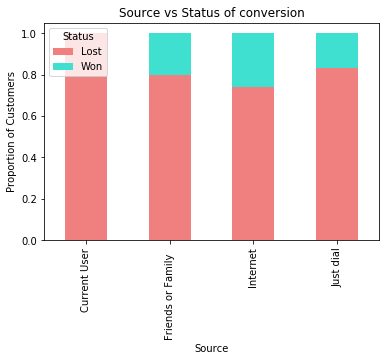

In [38]:
table=pd.crosstab(data['Source'],data.Status)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=clr)
plt.title('Source vs Status of conversion')
plt.xlabel('Source')
plt.ylabel('Proportion of Customers')
print(table)

Status      Lost  Won
Aesthetics           
disliked     176   44
liked          0    9


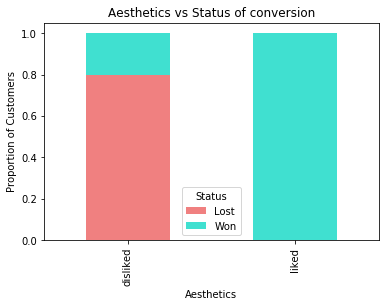

In [39]:
table=pd.crosstab(data['Aesthetics'],data.Status)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=clr)
plt.title('Aesthetics vs Status of conversion')
plt.xlabel('Aesthetics')
plt.ylabel('Proportion of Customers')
print(table)

Status               Lost  Won
Reduce Street Noise           
disliked              176   29
liked                   0   24


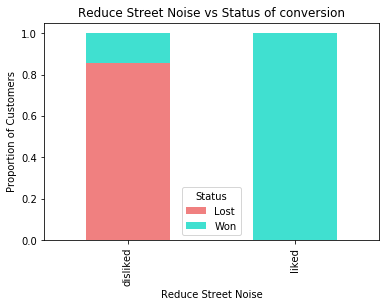

In [40]:
table=pd.crosstab(data['Reduce Street Noise'],data.Status)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=clr)
plt.title('Reduce Street Noise vs Status of conversion')
plt.xlabel('Reduce Street Noise')
plt.ylabel('Proportion of Customers')
print(table)

Status           Lost  Won
Low Maintenance           
disliked          176   35
liked               0   18


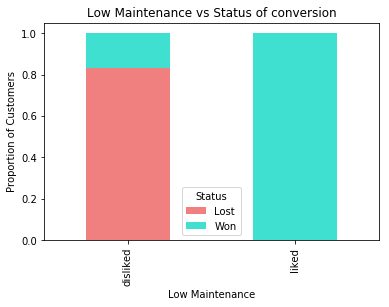

In [41]:
table=pd.crosstab(data['Low Maintenance'],data.Status)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=clr)
plt.title('Low Maintenance vs Status of conversion')
plt.xlabel('Low Maintenance')
plt.ylabel('Proportion of Customers')
print(table)

Status         Lost  Won
Monsoon Proof           
disliked        176   50
liked             0    3


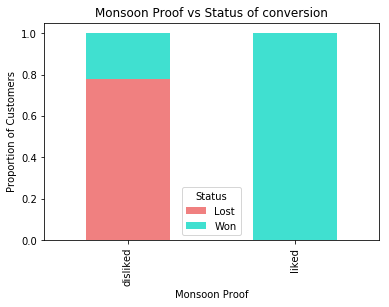

In [42]:
table=pd.crosstab(data['Monsoon Proof'],data.Status)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=clr)
plt.title('Monsoon Proof vs Status of conversion')
plt.xlabel('Monsoon Proof')
plt.ylabel('Proportion of Customers')
print(table)

Status           Lost  Won
Better Lighting           
disliked          176   52
liked               0    1


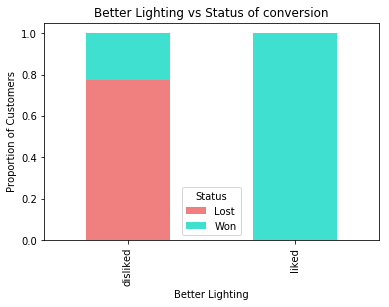

In [43]:
table=pd.crosstab(data['Better Lighting'],data.Status)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=clr)
plt.title('Better Lighting vs Status of conversion')
plt.xlabel('Better Lighting')
plt.ylabel('Proportion of Customers')
print(table)

Status                 Lost  Won
Reduce AC Energy Cost           
disliked                176   47
liked                     0    6


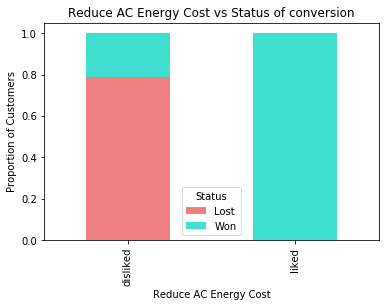

In [44]:
table=pd.crosstab(data['Reduce AC Energy Cost'],data.Status)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=clr)
plt.title('Reduce AC Energy Cost vs Status of conversion')
plt.xlabel('Reduce AC Energy Cost')
plt.ylabel('Proportion of Customers')
print(table)

## Logistic Regression

In [45]:
import statsmodels.api as sm

In [46]:
dt_cp = data.drop(columns=['Pincode'])

In [47]:
dt_cp = pd.get_dummies(dt_cp,drop_first=True)

x = dt_cp.drop(columns=['Status_Won'])
y = dt_cp[['Status_Won']]

In [48]:
x.head()

,Price Per Sft,Allocation Status_Direct,Type of Project_Renovation,No of Windows_100 +,No of Windows_11 to 20,No of Windows_21 to 40,No of Windows_41 to 100,No of Windows_6 to 10,Source_Friends or Family,Source_Internet,Source_Just dial,Aesthetics_liked,Reduce Street Noise_liked,Low Maintenance_liked,Monsoon Proof_liked,Better Lighting_liked,Reduce AC Energy Cost_liked
0,1105,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0
1,985,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
2,918,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,919,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
4,1350,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1


In [49]:
x.columns

Index(['Price Per Sft', 'Allocation Status_Direct',
       'Type of Project_Renovation', 'No of Windows_100 +',
       'No of Windows_11 to 20', 'No of Windows_21 to 40',
       'No of Windows_41 to 100', 'No of Windows_6 to 10',
       'Source_Friends or Family  ', 'Source_Internet', 'Source_Just dial',
       'Aesthetics_liked', 'Reduce Street Noise_liked',
       'Low Maintenance_liked', 'Monsoon Proof_liked', 'Better Lighting_liked',
       'Reduce AC Energy Cost_liked'],
      dtype='object')

In [50]:
y.head()

,Status_Won
0,1
1,0
2,0
3,0
4,1


In [51]:
y.columns

Index(['Status_Won'], dtype='object')

In [52]:
logit = sm.Logit(y,x)

In [53]:
lg = logit.fit()

         Current function value: inf
         Iterations: 35


D:\Greatlakes_apps_files\apps\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [54]:
lg.params

Price Per Sft                   0.003671
Allocation Status_Direct        1.587415
Type of Project_Renovation     -0.217811
No of Windows_100 +             0.691368
No of Windows_11 to 20         -0.753368
No of Windows_21 to 40          0.375577
No of Windows_41 to 100       -16.587342
No of Windows_6 to 10          -3.964940
Source_Friends or Family       -6.746201
Source_Internet                -6.493829
Source_Just dial               -5.144293
Aesthetics_liked                5.410244
Reduce Street Noise_liked      38.108273
Low Maintenance_liked          31.394783
Monsoon Proof_liked             2.043866
Better Lighting_liked         -12.573562
Reduce AC Energy Cost_liked    22.192290
dtype: float64

In [55]:
var_p_vals_df = pd.DataFrame( lg.pvalues, columns=['value'])
var_p_vals_df

,value
Price Per Sft,0.007079
Allocation Status_Direct,0.013868
Type of Project_Renovation,0.757458
No of Windows_100 +,0.696018
No of Windows_11 to 20,0.523328
No of Windows_21 to 40,0.710686
No of Windows_41 to 100,0.998819
No of Windows_6 to 10,0.159040
Source_Friends or Family,0.000084
Source_Internet,0.000134


In [56]:
params = lg.params
conf = lg.conf_int()
conf['Odds_ratio'] = params
conf.columns = ['2.5%', '97.5%', 'Odds_ratio']
np.exp(conf)

,2.5%,97.5%,Odds_ratio
Price Per Sft,1.001000,1.006363,1.003678e+00
Allocation Status_Direct,1.381288,17.319178,4.891091e+00
Type of Project_Renovation,0.201861,3.204488,8.042774e-01
No of Windows_100 +,0.062231,64.048270,1.996445e+00
No of Windows_11 to 20,0.046564,4.759761,4.707783e-01
No of Windows_21 to 40,0.200104,10.591687,1.455831e+00
No of Windows_41 to 100,0.000000,inf,6.254733e-08
No of Windows_6 to 10,0.000076,4.726224,1.896918e-02
Source_Friends or Family,0.000041,0.033906,1.175337e-03
Source_Internet,0.000054,0.042392,1.512745e-03


In [57]:
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:             Status_Won   No. Observations:                  229
Model:                          Logit   Df Residuals:                      212
Method:                           MLE   Df Model:                           16
Date:                Sat, 12 Jan 2019   Pseudo R-squ.:                     inf
Time:                        17:12:03   Log-Likelihood:                   -inf
converged:                      False   LL-Null:                        0.0000
                                        LLR p-value:                     1.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Price Per Sft                   0.0037      0.001      2.693      0.007       0.001       0.006
Allocation Status_Direct        1.5874      0.645      2.461      0.014       0.

In [58]:
def get_significant_vars( lm ):
    var_p_vals_df.columns = ['pvals']
    a = var_p_vals_df[var_p_vals_df.pvals < 0.05]
    return(a)

In [59]:
get_significant_vars(lg)

,pvals
Price Per Sft,0.007079
Allocation Status_Direct,0.013868
Source_Friends or Family,0.000084
Source_Internet,0.000134
Source_Just dial,0.017163


## Modelling using significant features

In [116]:
X = x[['Price Per Sft','Allocation Status_Direct','Source_Friends or Family  ','Source_Internet','Source_Just dial']]

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [118]:
pred = logreg.predict(X_test)

In [119]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=uint8)

In [120]:
from sklearn.metrics import classification_report,confusion_matrix

In [121]:
mat = confusion_matrix(y_test,pred)
c_report = classification_report(y_test,pred)
accuracy = (mat[0][0]+mat[1][1])/(mat[0][0]+mat[0][1]+mat[1][0]+mat[1][1])

print("confusion matrix = \n",mat," \n\n Classification Report = \n ",c_report, "\n\n Accuracy = ",accuracy )

confusion matrix = 
 [[49  0]
 [19  1]]  

 Classification Report = 
               precision    recall  f1-score   support

          0       0.72      1.00      0.84        49
          1       1.00      0.05      0.10        20

avg / total       0.80      0.72      0.62        69
 

 Accuracy =  0.7246376811594203


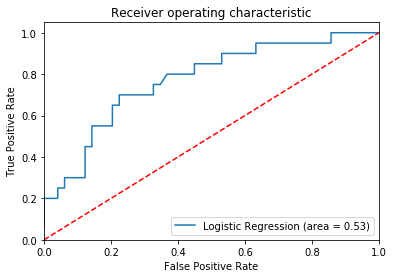

In [122]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Evaluating Train  and test metrics seperately

## Train metrics

In [123]:
logreg.fit(X_train, y_train)
y_predict_train = logreg.predict(X_train)
y_predict_train

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [124]:
mat = confusion_matrix(y_train,y_predict_train)
c_report = classification_report(y_train,y_predict_train)
accuracy = (mat[0][0]+mat[1][1])/(mat[0][0]+mat[0][1]+mat[1][0]+mat[1][1])

print("confusion matrix = \n",mat," \n\n Classification Report = \n ",c_report, "\n\n Accuracy = ",accuracy )

confusion matrix = 
 [[127   0]
 [ 32   1]]  

 Classification Report = 
               precision    recall  f1-score   support

          0       0.80      1.00      0.89       127
          1       1.00      0.03      0.06        33

avg / total       0.84      0.80      0.72       160
 

 Accuracy =  0.8


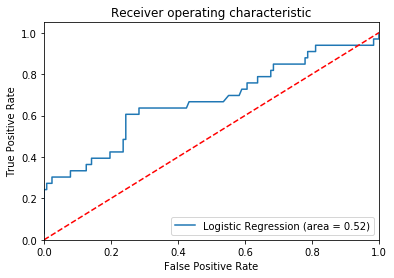

In [125]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_train, logreg.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, logreg.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Test metrics

In [126]:
logreg.fit(X_test, y_test)
y_predict_test = logreg.predict(X_test)
y_predict_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0], dtype=uint8)

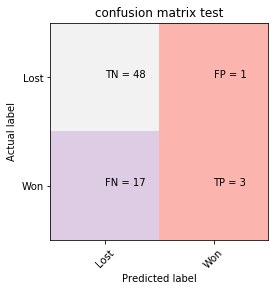

confusion matrix = 
 [[48  1]
 [17  3]]  

 Classification Report = 
               precision    recall  f1-score   support

          0       0.74      0.98      0.84        49
          1       0.75      0.15      0.25        20

avg / total       0.74      0.74      0.67        69
 

 Accuracy =  0.7391304347826086


In [129]:
mat = confusion_matrix(y_test,y_predict_test)
c_report = classification_report(y_test,y_predict_test)
accuracy = (mat[0][0]+mat[1][1])/(mat[0][0]+mat[0][1]+mat[1][0]+mat[1][1])
plt.clf()
plt.imshow(mat, interpolation='nearest', cmap='Pastel1')
title = 'confusion matrix test'
plt.title(title);
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
classNames = ['Lost','Won']
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):         # This find the TP,TN,FP,FN values and displays it
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(mat[i][j]))
plt.show()

print("confusion matrix = \n",mat," \n\n Classification Report = \n ",c_report, "\n\n Accuracy = ",accuracy )

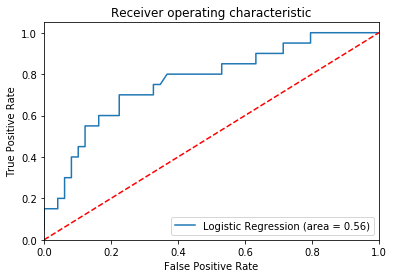

In [72]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [73]:
def Class_Model_accuracy():
    m1 = LogisticRegression()
 
    # Train metrics
    
    m1.fit(X_train, y_train)
    y_predict = m1.predict(X_train)
    c1_matrix =(confusion_matrix(y_train,y_predict))
   
    Sensitivity =(c1_matrix[1][1])/(c1_matrix[1][1] + c1_matrix[1][0])
    Specificity =(c1_matrix[0][0])/(c1_matrix[0][0]+c1_matrix[0][1])
    Precision = (c1_matrix[1][1])/(c1_matrix[1][1]+c1_matrix[0][1])
    False_positive_rate =(c1_matrix[0][1])/(c1_matrix[0][1] + c1_matrix[0][0])    
    False_negative_rate = (c1_matrix[1][0])/(c1_matrix[1][0]+c1_matrix[1][1])
    Train_Accuracy = (c1_matrix[0][0] + c1_matrix[1][1])/ sum(sum(c1_matrix))   
    train_logit_roc_auc = roc_auc_score(y_train, y_predict) 
    
    train_accuracies = [len(y_train), Train_Accuracy , 
                        Sensitivity , Specificity,Precision, False_negative_rate, False_positive_rate,
                        train_logit_roc_auc]
    c1_class_report =  classification_report(y_train,y_predict)
    plt.clf()
    plt.imshow(c1_matrix, interpolation='nearest', cmap='Pastel1')
    title = 'confusion matrix train'
    plt.title(title);
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    classNames = ['Lost','Won']
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):         # This find the TP,TN,FP,FN values and displays it
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(c1_matrix[i][j]))
    plt.show()
    print("\n classification report train = \n",c1_class_report)
     
    #Test metrics
    
    m1.fit(X_test, y_test)
    y_predict_test = m1.predict(X_test)   
    c2_matrix =(confusion_matrix(y_test,y_predict_test))
   
    test_Sensitivity =(c2_matrix[1][1])/(c2_matrix[1][0] + c2_matrix[1][1])    
    test_Specificity =(c2_matrix[0][0])/(c2_matrix[0][0]+c2_matrix[0][1])    
    test_Precision = (c2_matrix[1][1])/(c2_matrix[1][1]+c2_matrix[0][1])
    test_False_positive_rate =(c2_matrix[0][1])/(c2_matrix[0][1] + c2_matrix[0][0])    
    test_False_negative_rate = (c2_matrix[1][0])/(c2_matrix[1][0]+c2_matrix[1][1])    
    Test_Accuracy = (c2_matrix[0][0] + c2_matrix[1][1])/ sum(sum(c2_matrix))
    test_logit_roc_auc = roc_auc_score(y_test, y_predict_test)
        
    test_accuracies = [len(y_test), Test_Accuracy ,
                       test_Sensitivity , test_Specificity,test_Precision, test_False_negative_rate, test_False_positive_rate,
                       test_logit_roc_auc]
    
    c2_class_report =  classification_report(y_test,y_predict_test)
    plt.clf()
    plt.imshow(c2_matrix, interpolation='nearest', cmap='Pastel1')
    title = 'confusion matrix test'
    plt.title(title);
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    classNames = ['Lost','Won']
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):         # This find the TP,TN,FP,FN values and displays it
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(c2_matrix[i][j]))
    plt.show()
    print("\n classification report test = \n ", c2_class_report)
    
    result_df = pd.DataFrame(index = ["dataSize","Accuracy","Sensitivity","Specificity","Precision",
                                      "False Negative Rate", "False Positive Rate","AUC"])
    
    result_df['train'] = train_accuracies
    result_df['test'] = test_accuracies
    
    return(round(result_df,2))

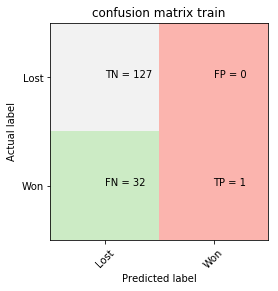


 classification report train = 
              precision    recall  f1-score   support

          0       0.80      1.00      0.89       127
          1       1.00      0.03      0.06        33

avg / total       0.84      0.80      0.72       160



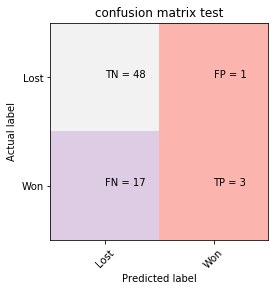


 classification report test = 
               precision    recall  f1-score   support

          0       0.74      0.98      0.84        49
          1       0.75      0.15      0.25        20

avg / total       0.74      0.74      0.67        69



,dataSize,Accuracy,Sensitivity,Specificity,Precision,False Negative Rate,False Positive Rate,AUC
train,160.0,0.80,0.03,1.00,1.00,0.97,0.00,0.52
test,69.0,0.74,0.15,0.98,0.75,0.85,0.02,0.56


In [74]:
Class_Model_accuracy().T

## Tuning Logistic Regression

In [75]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,roc_auc_score

In [76]:
result = pd.DataFrame(index=["accuracy", "recall", "precision", "roc_auc_score"])
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
for i in threshold_list:
    preds = np.where(logreg.predict_proba(X_train)[:,1] > i, 1, 0)
    result[i] = pd.Series(data=[accuracy_score(y_train, preds), recall_score(y_train, preds),
                                precision_score(y_train, preds), roc_auc_score(y_train, preds)],index=result.index)

In [77]:
result.T

,accuracy,recall,precision,roc_auc_score
0.05,0.20625,1.000000,0.206250,0.500000
0.10,0.20625,1.000000,0.206250,0.500000
0.15,0.20000,0.969697,0.201258,0.484848
0.20,0.33125,0.878788,0.219697,0.533882
0.25,0.46250,0.696970,0.232323,0.549272
0.30,0.64375,0.575758,0.306452,0.618587
0.35,0.73750,0.454545,0.384615,0.632785
0.40,0.80000,0.393939,0.520000,0.649726
0.45,0.84375,0.303030,0.833333,0.643641
0.50,0.83750,0.212121,1.000000,0.606061


In [78]:
result = pd.DataFrame(index=["accuracy", "recall", "precision", "roc_auc_score"])
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
for i in threshold_list:
    preds = np.where(logreg.predict_proba(X_test)[:,1] > i, 1, 0)
    result[i] = pd.Series(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                                precision_score(y_test, preds), roc_auc_score(y_test, preds)],index=result.index)

In [79]:
result.T

,accuracy,recall,precision,roc_auc_score
0.05,0.289855,1.00,0.289855,0.500000
0.10,0.289855,1.00,0.289855,0.500000
0.15,0.289855,1.00,0.289855,0.500000
0.20,0.376812,1.00,0.317460,0.561224
0.25,0.565217,0.85,0.386364,0.649490
0.30,0.695652,0.70,0.482759,0.696939
0.35,0.768116,0.60,0.600000,0.718367
0.40,0.782609,0.55,0.647059,0.713776
0.45,0.739130,0.30,0.600000,0.609184
0.50,0.739130,0.15,0.750000,0.564796


## Logistic Regression with 0.15 as threshold

In [80]:
def LR1_Model():
    m1 = LogisticRegression()
 
    # Train metrics
    
    m1.fit(X_train, y_train)
    y_predict = np.where(m1.predict_proba(X_train)[:,1] > 0.15, 1, 0)
    c1_matrix =(confusion_matrix(y_train,y_predict))
   
    Sensitivity =(c1_matrix[1][1])/(c1_matrix[1][1] + c1_matrix[1][0])
    Specificity =(c1_matrix[0][0])/(c1_matrix[0][0]+c1_matrix[0][1])
    Precision = (c1_matrix[1][1])/(c1_matrix[1][1]+c1_matrix[0][1])
    False_positive_rate =(c1_matrix[0][1])/(c1_matrix[0][1] + c1_matrix[0][0])    
    False_negative_rate = (c1_matrix[1][0])/(c1_matrix[1][0]+c1_matrix[1][1])
    Train_Accuracy = (c1_matrix[0][0] + c1_matrix[1][1])/ sum(sum(c1_matrix))   
    train_logit_roc_auc = roc_auc_score(y_train, y_predict) 
    
    train_accuracies = [len(y_train), Train_Accuracy , 
                        Sensitivity , Specificity,Precision, False_negative_rate, False_positive_rate,
                        train_logit_roc_auc]
    c1_class_report =  classification_report(y_train,y_predict)
    print("\n confusion matrix train = \n",c1_matrix)
    print("\n classification report train = \n",c1_class_report)
     
    #Test metrics
    
    m1.fit(X_test, y_test)
    y_predict_test = np.where(m1.predict_proba(X_test)[:,1] > 0.15, 1, 0)   
    c2_matrix =(confusion_matrix(y_test,y_predict_test))
   
    test_Sensitivity =(c2_matrix[1][1])/(c2_matrix[1][0] + c2_matrix[1][1])    
    test_Specificity =(c2_matrix[0][0])/(c2_matrix[0][0]+c2_matrix[0][1])    
    test_Precision = (c2_matrix[1][1])/(c2_matrix[1][1]+c2_matrix[0][1])
    test_False_positive_rate =(c2_matrix[0][1])/(c2_matrix[0][1] + c2_matrix[0][0])    
    test_False_negative_rate = (c2_matrix[1][0])/(c2_matrix[1][0]+c2_matrix[1][1])    
    Test_Accuracy = (c2_matrix[0][0] + c2_matrix[1][1])/ sum(sum(c2_matrix))
    test_logit_roc_auc = roc_auc_score(y_test, y_predict_test)
        
    test_accuracies = [len(y_test), Test_Accuracy ,
                       test_Sensitivity , test_Specificity,test_Precision, test_False_negative_rate, test_False_positive_rate,
                       test_logit_roc_auc]
    
    c2_class_report =  classification_report(y_test,y_predict_test)
    print("\n classification report test = \n",c2_class_report)
    print("\n confusion matrix test = \n",c2_matrix)
    
    result_df = pd.DataFrame(index = ["dataSize","Accuracy","Sensitivity","Specificity","Precision",
                                      "False Negative Rate", "False Positive Rate","AUC"])
    
    result_df['train'] = train_accuracies
    result_df['test'] = test_accuracies
    
    return(round(result_df,2))

In [81]:
LR1_Model().T


 confusion matrix train = 
 [[ 19 108]
 [  2  31]]

 classification report train = 
              precision    recall  f1-score   support

          0       0.90      0.15      0.26       127
          1       0.22      0.94      0.36        33

avg / total       0.76      0.31      0.28       160


 classification report test = 
              precision    recall  f1-score   support

          0       0.00      0.00      0.00        49
          1       0.29      1.00      0.45        20

avg / total       0.08      0.29      0.13        69


 confusion matrix test = 
 [[ 0 49]
 [ 0 20]]


,dataSize,Accuracy,Sensitivity,Specificity,Precision,False Negative Rate,False Positive Rate,AUC
train,160.0,0.31,0.94,0.15,0.22,0.06,0.85,0.54
test,69.0,0.29,1.00,0.00,0.29,0.00,1.00,0.50


## Logistic regression with threshold = 0.25

In [82]:
def LR2_Model():
    m1 = LogisticRegression()
 
    # Train metrics
    
    m1.fit(X_train, y_train)
    y_predict = np.where(m1.predict_proba(X_train)[:,1] > 0.25, 1, 0)
    c1_matrix =(confusion_matrix(y_train,y_predict))
   
    Sensitivity =(c1_matrix[1][1])/(c1_matrix[1][1] + c1_matrix[1][0])
    Specificity =(c1_matrix[0][0])/(c1_matrix[0][0]+c1_matrix[0][1])
    Precision = (c1_matrix[1][1])/(c1_matrix[1][1]+c1_matrix[0][1])
    False_positive_rate =(c1_matrix[0][1])/(c1_matrix[0][1] + c1_matrix[0][0])    
    False_negative_rate = (c1_matrix[1][0])/(c1_matrix[1][0]+c1_matrix[1][1])
    Train_Accuracy = (c1_matrix[0][0] + c1_matrix[1][1])/ sum(sum(c1_matrix))   
    train_logit_roc_auc = roc_auc_score(y_train, y_predict) 
    
    train_accuracies = [len(y_train), Train_Accuracy , 
                        Sensitivity , Specificity,Precision, False_negative_rate, False_positive_rate,
                        train_logit_roc_auc]
    c1_class_report =  classification_report(y_train,y_predict)
    plt.clf()
    plt.imshow(c1_matrix, interpolation='nearest', cmap='Pastel1')
    title = 'confusion matrix train'
    plt.title(title);
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    classNames = ['Lost','Won']
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):         # This find the TP,TN,FP,FN values and displays it
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(c1_matrix[i][j]))
    plt.show()
    print("\n classification report train = \n",c1_class_report)
     
    #Test metrics
    
    m1.fit(X_test, y_test)
    y_predict_test = np.where(m1.predict_proba(X_test)[:,1] > 0.25, 1, 0)   
    c2_matrix =(confusion_matrix(y_test,y_predict_test))
   
    test_Sensitivity =(c2_matrix[1][1])/(c2_matrix[1][0] + c2_matrix[1][1])    
    test_Specificity =(c2_matrix[0][0])/(c2_matrix[0][0]+c2_matrix[0][1])    
    test_Precision = (c2_matrix[1][1])/(c2_matrix[1][1]+c2_matrix[0][1])
    test_False_positive_rate =(c2_matrix[0][1])/(c2_matrix[0][1] + c2_matrix[0][0])    
    test_False_negative_rate = (c2_matrix[1][0])/(c2_matrix[1][0]+c2_matrix[1][1])    
    Test_Accuracy = (c2_matrix[0][0] + c2_matrix[1][1])/ sum(sum(c2_matrix))
    test_logit_roc_auc = roc_auc_score(y_test, y_predict_test)
        
    test_accuracies = [len(y_test), Test_Accuracy ,
                       test_Sensitivity , test_Specificity,test_Precision, test_False_negative_rate, test_False_positive_rate,
                       test_logit_roc_auc]
    
    c2_class_report =  classification_report(y_test,y_predict_test)
    plt.clf()
    plt.imshow(c2_matrix, interpolation='nearest', cmap='Pastel1')
    title = 'confusion matrix test'
    plt.title(title);
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    classNames = ['Lost','Won']
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):         # This find the TP,TN,FP,FN values and displays it
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(c2_matrix[i][j]))
    plt.show()
    print("\n classification report test = \n",c2_class_report)
    
    
    result_df = pd.DataFrame(index = ["dataSize","Accuracy","Sensitivity","Specificity","Precision",
                                      "False Negative Rate", "False Positive Rate","AUC"])
    
    result_df['train'] = train_accuracies
    result_df['test'] = test_accuracies
    
    return(round(result_df,2))

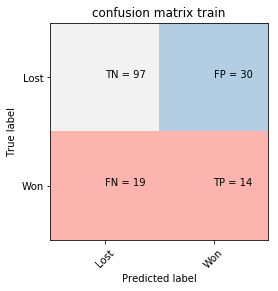


 classification report train = 
              precision    recall  f1-score   support

          0       0.84      0.76      0.80       127
          1       0.32      0.42      0.36        33

avg / total       0.73      0.69      0.71       160



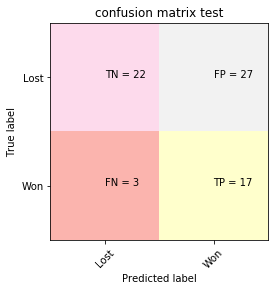


 classification report test = 
              precision    recall  f1-score   support

          0       0.88      0.45      0.59        49
          1       0.39      0.85      0.53        20

avg / total       0.74      0.57      0.58        69



,dataSize,Accuracy,Sensitivity,Specificity,Precision,False Negative Rate,False Positive Rate,AUC
train,160.0,0.69,0.42,0.76,0.32,0.58,0.24,0.59
test,69.0,0.57,0.85,0.45,0.39,0.15,0.55,0.65


In [83]:
LR2_Model().T

## Logistic regression with threshold = 0.30

In [84]:
def LR3_Model():
    m1 = LogisticRegression()
 
    # Train metrics
    
    m1.fit(X_train, y_train)
    y_predict = np.where(m1.predict_proba(X_train)[:,1] > 0.30, 1, 0)
    c1_matrix =(confusion_matrix(y_train,y_predict))
   
    Sensitivity =(c1_matrix[1][1])/(c1_matrix[1][1] + c1_matrix[1][0])
    Specificity =(c1_matrix[0][0])/(c1_matrix[0][0]+c1_matrix[0][1])
    Precision = (c1_matrix[1][1])/(c1_matrix[1][1]+c1_matrix[0][1])
    False_positive_rate =(c1_matrix[0][1])/(c1_matrix[0][1] + c1_matrix[0][0])    
    False_negative_rate = (c1_matrix[1][0])/(c1_matrix[1][0]+c1_matrix[1][1])
    Train_Accuracy = (c1_matrix[0][0] + c1_matrix[1][1])/ sum(sum(c1_matrix))   
    train_logit_roc_auc = roc_auc_score(y_train, y_predict) 
    
    train_accuracies = [len(y_train), Train_Accuracy , 
                        Sensitivity , Specificity,Precision, False_negative_rate, False_positive_rate,
                        train_logit_roc_auc]
    c1_class_report =  classification_report(y_train,y_predict)
    print("\n confusion matrix train = \n",c1_matrix)
    print("\n classification report train = \n",c1_class_report)
     
    #Test metrics
    
    m1.fit(X_test, y_test)
    y_predict_test = np.where(m1.predict_proba(X_test)[:,1] > 0.30, 1, 0)   
    c2_matrix =(confusion_matrix(y_test,y_predict_test))
   
    test_Sensitivity =(c2_matrix[1][1])/(c2_matrix[1][0] + c2_matrix[1][1])    
    test_Specificity =(c2_matrix[0][0])/(c2_matrix[0][0]+c2_matrix[0][1])    
    test_Precision = (c2_matrix[1][1])/(c2_matrix[1][1]+c2_matrix[0][1])
    test_False_positive_rate =(c2_matrix[0][1])/(c2_matrix[0][1] + c2_matrix[0][0])    
    test_False_negative_rate = (c2_matrix[1][0])/(c2_matrix[1][0]+c2_matrix[1][1])    
    Test_Accuracy = (c2_matrix[0][0] + c2_matrix[1][1])/ sum(sum(c2_matrix))
    test_logit_roc_auc = roc_auc_score(y_test, y_predict_test)
        
    test_accuracies = [len(y_test), Test_Accuracy ,
                       test_Sensitivity , test_Specificity,test_Precision, test_False_negative_rate, test_False_positive_rate,
                       test_logit_roc_auc]
    
    c2_class_report =  classification_report(y_test,y_predict_test)
    
    print("\n confusion matrix test = \n",c2_matrix)
    print("\n classification report test = \n",c2_class_report)
    
    
    result_df = pd.DataFrame(index = ["dataSize","Accuracy","Sensitivity","Specificity","Precision",
                                      "False Negative Rate", "False Positive Rate","AUC"])
    
    result_df['train'] = train_accuracies
    result_df['test'] = test_accuracies
    
    return(round(result_df,2))

In [85]:
LR3_Model().T


 confusion matrix train = 
 [[114  13]
 [ 22  11]]

 classification report train = 
              precision    recall  f1-score   support

          0       0.84      0.90      0.87       127
          1       0.46      0.33      0.39        33

avg / total       0.76      0.78      0.77       160


 confusion matrix test = 
 [[34 15]
 [ 6 14]]

 classification report test = 
              precision    recall  f1-score   support

          0       0.85      0.69      0.76        49
          1       0.48      0.70      0.57        20

avg / total       0.74      0.70      0.71        69



,dataSize,Accuracy,Sensitivity,Specificity,Precision,False Negative Rate,False Positive Rate,AUC
train,160.0,0.78,0.33,0.90,0.46,0.67,0.10,0.62
test,69.0,0.70,0.70,0.69,0.48,0.30,0.31,0.70


## Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier

D:\Greatlakes_apps_files\apps\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [87]:
x = dt_cp.drop(columns=['Status_Won'])
y = dt_cp[['Status_Won']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [88]:
def RF_Model():
    m1 = RandomForestClassifier()
    
    # Train metrics
    
    m1.fit(X_train, y_train)
    y_predict = m1.predict(X_train)
    c1_matrix =(confusion_matrix(y_train,y_predict))
   
    Sensitivity =(c1_matrix[1][1])/(c1_matrix[1][1] + c1_matrix[1][0])
    Specificity =(c1_matrix[0][0])/(c1_matrix[0][0]+c1_matrix[0][1])
    Precision = (c1_matrix[1][1])/(c1_matrix[1][1]+c1_matrix[0][1])
    False_positive_rate =(c1_matrix[0][1])/(c1_matrix[0][1] + c1_matrix[0][0])    
    False_negative_rate = (c1_matrix[1][0])/(c1_matrix[1][0]+c1_matrix[1][1])
    Train_Accuracy = (c1_matrix[0][0] + c1_matrix[1][1])/ sum(sum(c1_matrix))   
    train_logit_roc_auc = roc_auc_score(y_train, y_predict) 
    
    train_accuracies = [len(y_train), Train_Accuracy , 
                        Sensitivity , Specificity,Precision, False_negative_rate, False_positive_rate,
                        train_logit_roc_auc]
    c1_class_report =  classification_report(y_train,y_predict)
    plt.clf()
    plt.imshow(c1_matrix, interpolation='nearest', cmap='Pastel1')
    title = 'confusion matrix train'
    plt.title(title);
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    classNames = ['Lost','Won']
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):         
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(c1_matrix[i][j]))
    plt.show()
    print("\n classification report train = \n",c1_class_report)
     
  

    #Test metrics
    
    m1.fit(X_test, y_test)
    y_predict_test = m1.predict(X_test)   
    c2_matrix =(confusion_matrix(y_test,y_predict_test))
   
    test_Sensitivity =(c2_matrix[1][1])/(c2_matrix[1][0] + c2_matrix[1][1])    
    test_Specificity =(c2_matrix[0][0])/(c2_matrix[0][0]+c2_matrix[0][1])    
    test_Precision = (c2_matrix[1][1])/(c2_matrix[1][1]+c2_matrix[0][1])
    test_False_positive_rate =(c2_matrix[0][1])/(c2_matrix[0][1] + c2_matrix[0][0])    
    test_False_negative_rate = (c2_matrix[1][0])/(c2_matrix[1][0]+c2_matrix[1][1])    
    Test_Accuracy = (c2_matrix[0][0] + c2_matrix[1][1])/ sum(sum(c2_matrix))
    test_logit_roc_auc = roc_auc_score(y_test, y_predict_test)
        
    test_accuracies = [len(y_test), Test_Accuracy ,
                       test_Sensitivity , test_Specificity,test_Precision, test_False_negative_rate, test_False_positive_rate,
                       test_logit_roc_auc]
    
    c2_class_report =  classification_report(y_test,y_predict_test)
    plt.clf()
    plt.imshow(c2_matrix, interpolation='nearest', cmap='Pastel1')
    title = 'confusion matrix test'
    plt.title(title);
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    classNames = ['Lost','Won']
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):         
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(c2_matrix[i][j]))
    plt.show()
    print("\n classification report test = \n", c2_class_report)
    
    
    result_df = pd.DataFrame(index = ["dataSize","Accuracy","Sensitivity","Specificity","Precision",
                                      "False Negative Rate", "False Positive Rate","AUC"])
    
    result_df['train'] = train_accuracies
    result_df['test'] = test_accuracies
    
    return(round(result_df,2))

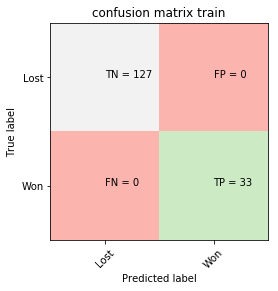


 classification report train = 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00       127
          1       1.00      1.00      1.00        33

avg / total       1.00      1.00      1.00       160



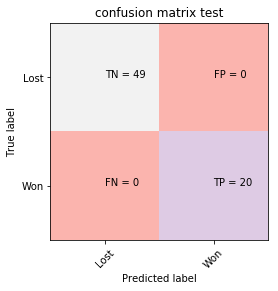


 classification report test = 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        49
          1       1.00      1.00      1.00        20

avg / total       1.00      1.00      1.00        69



,dataSize,Accuracy,Sensitivity,Specificity,Precision,False Negative Rate,False Positive Rate,AUC
train,160.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
test,69.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0


In [89]:
RF_Model().T

## Feature Importance for RandomForest

In [90]:
rcfl = RandomForestClassifier()
rcfl.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

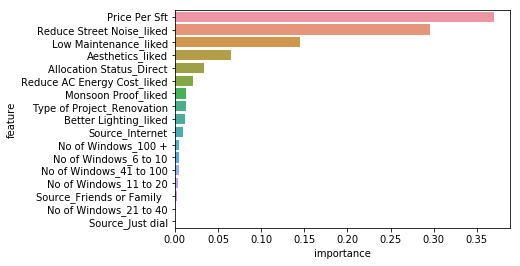

In [91]:
indices = np.argsort(rcfl.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(X_train.shape[1]):
    feature_rank.loc[f] = [f+1,
                           X_train.columns[indices[f]],
                           rcfl.feature_importances_[indices[f]]]

sns.barplot( y = 'feature', x = 'importance', data = feature_rank )

## Taking important variables from the above plot

In [92]:
X = x[['Price Per Sft','Reduce Street Noise_liked','Low Maintenance_liked','Reduce AC Energy Cost_liked',
      'Aesthetics_liked','Allocation Status_Direct','Type of Project_Renovation','Monsoon Proof_liked']]

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [94]:
def RF_Model():
    m1 = RandomForestClassifier()
 
    # Train metrics
    
    m1.fit(X_train, y_train)
    y_predict = m1.predict(X_train)
    c1_matrix =(confusion_matrix(y_train,y_predict))
   
    Sensitivity =(c1_matrix[1][1])/(c1_matrix[1][1] + c1_matrix[1][0])
    Specificity =(c1_matrix[0][0])/(c1_matrix[0][0]+c1_matrix[0][1])
    Precision = (c1_matrix[1][1])/(c1_matrix[1][1]+c1_matrix[0][1])
    False_positive_rate =(c1_matrix[0][1])/(c1_matrix[0][1] + c1_matrix[0][0])    
    False_negative_rate = (c1_matrix[1][0])/(c1_matrix[1][0]+c1_matrix[1][1])
    Train_Accuracy = (c1_matrix[0][0] + c1_matrix[1][1])/ sum(sum(c1_matrix))   
    train_logit_roc_auc = roc_auc_score(y_train, y_predict) 
    
    train_accuracies = [len(y_train), Train_Accuracy , 
                        Sensitivity , Specificity,Precision, False_negative_rate, False_positive_rate,
                        train_logit_roc_auc]
    c1_class_report =  classification_report(y_train,y_predict)
    plt.clf()
    plt.imshow(c1_matrix, interpolation='nearest', cmap='Pastel1')
    title = 'confusion matrix train'
    plt.title(title);
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    classNames = ['Lost','Won']
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):         
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(c1_matrix[i][j]))
    plt.show()
    print("\n classification report train = \n",c1_class_report)
     
    #Test metrics
    
    m1.fit(X_test, y_test)
    y_predict_test = m1.predict(X_test)   
    c2_matrix =(confusion_matrix(y_test,y_predict_test))
   
    test_Sensitivity =(c2_matrix[1][1])/(c2_matrix[1][0] + c2_matrix[1][1])    
    test_Specificity =(c2_matrix[0][0])/(c2_matrix[0][0]+c2_matrix[0][1])    
    test_Precision = (c2_matrix[1][1])/(c2_matrix[1][1]+c2_matrix[0][1])
    test_False_positive_rate =(c2_matrix[0][1])/(c2_matrix[0][1] + c2_matrix[0][0])    
    test_False_negative_rate = (c2_matrix[1][0])/(c2_matrix[1][0]+c2_matrix[1][1])    
    Test_Accuracy = (c2_matrix[0][0] + c2_matrix[1][1])/ sum(sum(c2_matrix))
    test_logit_roc_auc = roc_auc_score(y_test, y_predict_test)
        
    test_accuracies = [len(y_test), Test_Accuracy ,
                       test_Sensitivity , test_Specificity,test_Precision, test_False_negative_rate, test_False_positive_rate,
                       test_logit_roc_auc]
    
    c2_class_report =  classification_report(y_test,y_predict_test)
    plt.clf()
    plt.imshow(c2_matrix, interpolation='nearest', cmap='Pastel1')
    title = 'confusion matrix test'
    plt.title(title);
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    classNames = ['Lost','Won']
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):         # This find the TP,TN,FP,FN values and displays it
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(c2_matrix[i][j]))
    plt.show()
    print("\n classification report test = \n", c2_class_report)
    
    
    result_df = pd.DataFrame(index = ["dataSize","Accuracy","Sensitivity","Specificity","Precision",
                                      "False Negative Rate", "False Positive Rate","AUC"])
    
    result_df['train'] = train_accuracies
    result_df['test'] = test_accuracies
    
    return(round(result_df,2))

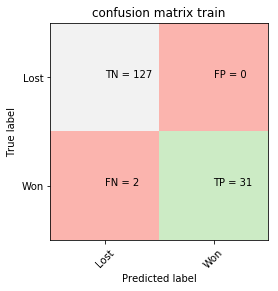


 classification report train = 
              precision    recall  f1-score   support

          0       0.98      1.00      0.99       127
          1       1.00      0.94      0.97        33

avg / total       0.99      0.99      0.99       160



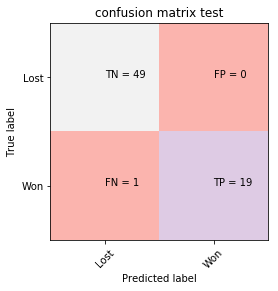


 classification report test = 
              precision    recall  f1-score   support

          0       0.98      1.00      0.99        49
          1       1.00      0.95      0.97        20

avg / total       0.99      0.99      0.99        69



,dataSize,Accuracy,Sensitivity,Specificity,Precision,False Negative Rate,False Positive Rate,AUC
train,160.0,0.99,0.94,1.0,1.0,0.06,0.0,0.97
test,69.0,0.99,0.95,1.0,1.0,0.05,0.0,0.98


In [95]:
RF_Model().T

## Gradient Boosting Method

In [96]:
from sklearn.ensemble import GradientBoostingClassifier

In [97]:
x = dt_cp.drop(columns=['Status_Won'])
y = dt_cp[['Status_Won']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [98]:
def GB_Model():
    m1 = GradientBoostingClassifier()
 
    # Train metrics
    
    m1.fit(X_train, y_train)
    y_predict = m1.predict(X_train)
    c1_matrix =(confusion_matrix(y_train,y_predict))
   
    Sensitivity =(c1_matrix[1][1])/(c1_matrix[1][1] + c1_matrix[1][0])
    Specificity =(c1_matrix[0][0])/(c1_matrix[0][0]+c1_matrix[0][1])
    Precision = (c1_matrix[1][1])/(c1_matrix[1][1]+c1_matrix[0][1])
    False_positive_rate =(c1_matrix[0][1])/(c1_matrix[0][1] + c1_matrix[0][0])    
    False_negative_rate = (c1_matrix[1][0])/(c1_matrix[1][0]+c1_matrix[1][1])
    Train_Accuracy = (c1_matrix[0][0] + c1_matrix[1][1])/ sum(sum(c1_matrix))   
    train_logit_roc_auc = roc_auc_score(y_train, y_predict) 
    
    train_accuracies = [len(y_train), Train_Accuracy , 
                        Sensitivity , Specificity,Precision, False_negative_rate, False_positive_rate,
                        train_logit_roc_auc]
    c1_class_report =  classification_report(y_train,y_predict)
    plt.clf()
    plt.imshow(c1_matrix, interpolation='nearest', cmap='Pastel1')
    title = 'confusion matrix train'
    plt.title(title);
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    classNames = ['Lost','Won']
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):         # This find the TP,TN,FP,FN values and displays it
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(c1_matrix[i][j]))
    plt.show()
    print("\n classification report train = \n",c1_class_report)
     
    #Test metrics
    
    m1.fit(X_test, y_test)
    y_predict_test = m1.predict(X_test)   
    c2_matrix =(confusion_matrix(y_test,y_predict_test))
   
    test_Sensitivity =(c2_matrix[1][1])/(c2_matrix[1][0] + c2_matrix[1][1])    
    test_Specificity =(c2_matrix[0][0])/(c2_matrix[0][0]+c2_matrix[0][1])    
    test_Precision = (c2_matrix[1][1])/(c2_matrix[1][1]+c2_matrix[0][1])
    test_False_positive_rate =(c2_matrix[0][1])/(c2_matrix[0][1] + c2_matrix[0][0])    
    test_False_negative_rate = (c2_matrix[1][0])/(c2_matrix[1][0]+c2_matrix[1][1])    
    Test_Accuracy = (c2_matrix[0][0] + c2_matrix[1][1])/ sum(sum(c2_matrix))
    test_logit_roc_auc = roc_auc_score(y_test, y_predict_test)
        
    test_accuracies = [len(y_test), Test_Accuracy ,
                       test_Sensitivity , test_Specificity,test_Precision, test_False_negative_rate, test_False_positive_rate,
                       test_logit_roc_auc]
    
    c2_class_report =  classification_report(y_test,y_predict_test)
    plt.clf()
    plt.imshow(c2_matrix, interpolation='nearest', cmap='Pastel1')
    title = 'confusion matrix test'
    plt.title(title);
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    classNames = ['Lost','Won']
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):         # This find the TP,TN,FP,FN values and displays it
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(c2_matrix[i][j]))
    plt.show()
    print("\n classification report test = \n", c2_class_report)
    
    
    result_df = pd.DataFrame(index = ["dataSize","Accuracy","Sensitivity","Specificity","Precision",
                                      "False Negative Rate", "False Positive Rate","AUC"])
    
    result_df['train'] = train_accuracies
    result_df['test'] = test_accuracies
    
    return(round(result_df,2))

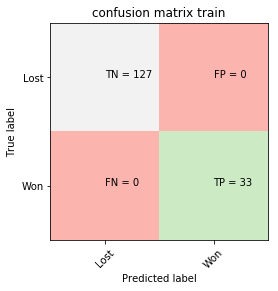


 classification report train = 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00       127
          1       1.00      1.00      1.00        33

avg / total       1.00      1.00      1.00       160



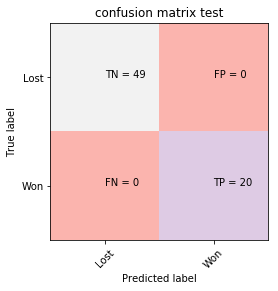


 classification report test = 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        49
          1       1.00      1.00      1.00        20

avg / total       1.00      1.00      1.00        69



,dataSize,Accuracy,Sensitivity,Specificity,Precision,False Negative Rate,False Positive Rate,AUC
train,160.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
test,69.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0


In [99]:
GB_Model().T

## Feature Importance for Gradient Boosting

In [100]:
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

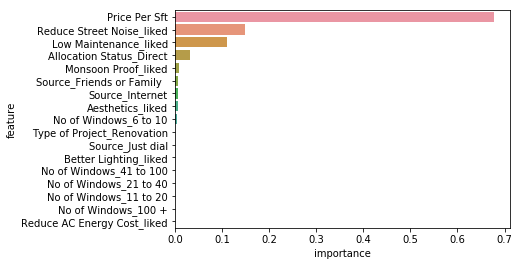

In [101]:
indices = np.argsort(gb.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(X_train.shape[1]):
    feature_rank.loc[f] = [f+1,
                           X_train.columns[indices[f]],
                           gb.feature_importances_[indices[f]]]

sns.barplot( y = 'feature', x = 'importance', data = feature_rank )

## Taking only importanat variables from the above plot

In [102]:
X = x[['Price Per Sft','Reduce Street Noise_liked','Low Maintenance_liked',
       'Allocation Status_Direct','No of Windows_11 to 20']]

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [104]:
def GB_Model():
    m1 = GradientBoostingClassifier()
 
    # Train metrics
    
    m1.fit(X_train, y_train)
    y_predict = m1.predict(X_train)
    c1_matrix =(confusion_matrix(y_train,y_predict))
   
    Sensitivity =(c1_matrix[1][1])/(c1_matrix[1][1] + c1_matrix[1][0])
    Specificity =(c1_matrix[0][0])/(c1_matrix[0][0]+c1_matrix[0][1])
    Precision = (c1_matrix[1][1])/(c1_matrix[1][1]+c1_matrix[0][1])
    False_positive_rate =(c1_matrix[0][1])/(c1_matrix[0][1] + c1_matrix[0][0])    
    False_negative_rate = (c1_matrix[1][0])/(c1_matrix[1][0]+c1_matrix[1][1])
    Train_Accuracy = (c1_matrix[0][0] + c1_matrix[1][1])/ sum(sum(c1_matrix))   
    train_logit_roc_auc = roc_auc_score(y_train, y_predict) 
    
    train_accuracies = [len(y_train), Train_Accuracy , 
                        Sensitivity , Specificity,Precision, False_negative_rate, False_positive_rate,
                        train_logit_roc_auc]
    c1_class_report =  classification_report(y_train,y_predict)
    plt.clf()
    plt.imshow(c1_matrix, interpolation='nearest', cmap='Pastel1')
    title = 'confusion matrix train'
    plt.title(title);
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    classNames = ['Lost','Won']
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):         # This find the TP,TN,FP,FN values and displays it
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(c1_matrix[i][j]))
    plt.show()
    print("\n classification report train = \n",c1_class_report)
     
    #Test metrics
    
    m1.fit(X_test, y_test)
    y_predict_test = m1.predict(X_test)   
    c2_matrix =(confusion_matrix(y_test,y_predict_test))
   
    test_Sensitivity =(c2_matrix[1][1])/(c2_matrix[1][0] + c2_matrix[1][1])    
    test_Specificity =(c2_matrix[0][0])/(c2_matrix[0][0]+c2_matrix[0][1])    
    test_Precision = (c2_matrix[1][1])/(c2_matrix[1][1]+c2_matrix[0][1])
    test_False_positive_rate =(c2_matrix[0][1])/(c2_matrix[0][1] + c2_matrix[0][0])    
    test_False_negative_rate = (c2_matrix[1][0])/(c2_matrix[1][0]+c2_matrix[1][1])    
    Test_Accuracy = (c2_matrix[0][0] + c2_matrix[1][1])/ sum(sum(c2_matrix))
    test_logit_roc_auc = roc_auc_score(y_test, y_predict_test)
        
    test_accuracies = [len(y_test), Test_Accuracy ,
                       test_Sensitivity , test_Specificity,test_Precision, test_False_negative_rate, test_False_positive_rate,
                       test_logit_roc_auc]
    
    c2_class_report =  classification_report(y_test,y_predict_test)
    plt.clf()
    plt.imshow(c2_matrix, interpolation='nearest', cmap='Pastel1')
    title = 'confusion matrix test'
    plt.title(title);
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    classNames = ['Lost','Won']
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):         # This find the TP,TN,FP,FN values and displays it
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(c2_matrix[i][j]))
    plt.show()
    print("\n classification report test = \n", c2_class_report)
    
    
    result_df = pd.DataFrame(index = ["dataSize","Accuracy","Sensitivity","Specificity","Precision",
                                      "False Negative Rate", "False Positive Rate","AUC"])
    
    result_df['train'] = train_accuracies
    result_df['test'] = test_accuracies
    
    return(round(result_df,2))

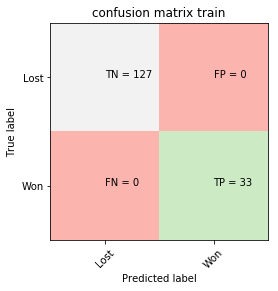


 classification report train = 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00       127
          1       1.00      1.00      1.00        33

avg / total       1.00      1.00      1.00       160



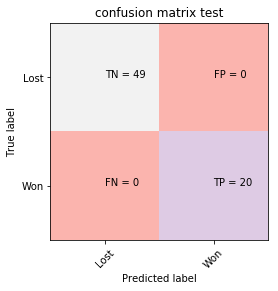


 classification report test = 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        49
          1       1.00      1.00      1.00        20

avg / total       1.00      1.00      1.00        69



,dataSize,Accuracy,Sensitivity,Specificity,Precision,False Negative Rate,False Positive Rate,AUC
train,160.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
test,69.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0


In [105]:
GB_Model().T

In [106]:
from sklearn.model_selection import LeaveOneOut
X = np.array(dt_cp.drop(columns=['Status_Won']))
y =np.array(dt_cp[['Status_Won']])
loo = LeaveOneOut()
loo.get_n_splits(X)

229

In [107]:
print(loo)

LeaveOneOut()


In [108]:
for train_index, test_index in loo.split(X):
   print("TRAIN:", train_index, "TEST:", test_index)
   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]
   print(X_train, X_test, y_train, y_test)

TRAIN: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228] TEST: [0]
[[ 985    0    0 ...    0    0    0]
 [ 918    0    0 ...

[[1105    0    1 ...    0    0    0]
 [ 985    0    0 ...    0    0    0]
 [ 918    0    0 ...    0    0    0]
 ...
 [1044    1    1 ...    0    0    0]
 [ 849    0    1 ...    0    0    0]
 [ 946    1    0 ...    0    0    0]] [[879   0   1   0   0   0   0   0   0   1   0   0   0   0   0   0   0]] [[1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]


 [ 946    1    0 ...    0    0    0]] [[1004    0    1    0    0    0    0    0    1    0    0    0    0    0
     0    0    0]] [[1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 

[[1105    0    1 ...    0    0    0]
 [ 985    0    0 ...    0    0    0]
 [ 918    0    0 ...    0    0    0]
 ...
 [1044    1    1 ...    0    0    0]
 [ 849    0    1 ...    0    0    0]
 [ 946    1    0 ...    0    0    0]] [[970   0   0   0   0   0   0   0   1   0   0   0   1   0   0   0   1]] [[1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]


 [0]] [[0]]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228] TEST: [120]
[[1105    0    1 ...    0    0    0]
 [ 985

 [ 946    1    0 ...    0    0    0]] [[1184    0    1    0    0    0    0    0    0    1    0    0    0    0
     0    0    0]] [[1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 

 217 218 219 220 221 222 223 224 225 226 227 228] TEST: [154]
[[1105    0    1 ...    0    0    0]
 [ 985    0    0 ...    0    0    0]
 [ 918    0    0 ...    0    0    0]
 ...
 [1044    1    1 ...    0    0    0]
 [ 849    0    1 ...    0    0    0]
 [ 946    1    0 ...    0    0    0]] [[1127    1    0    0    0    0    0    1    0    1    0    0    0    0
     0    0    0]] [[1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]

[[1105    0    1 ...    0    0    0]
 [ 985    0    0 ...    0    0    0]
 [ 918    0    0 ...    0    0    0]
 ...
 [1044    1    1 ...    0    0    0]
 [ 849    0    1 ...    0    0    0]
 [ 946    1    0 ...    0    0    0]] [[996   0   0   0   1   0   0   0   0   1   0   0   0   0   0   0   0]] [[1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]


 217 218 219 220 221 222 223 224 225 226 227 228] TEST: [199]
[[1105    0    1 ...    0    0    0]
 [ 985    0    0 ...    0    0    0]
 [ 918    0    0 ...    0    0    0]
 ...
 [1044    1    1 ...    0    0    0]
 [ 849    0    1 ...    0    0    0]
 [ 946    1    0 ...    0    0    0]] [[805   1   1   0   0   0   0   1   0   1   0   1   0   1   0   0   0]] [[1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0

In [109]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [110]:
pred = rf.predict(X_test)

In [111]:
confusion_matrix(y_test,pred)

array([[1]], dtype=int64)